## Importing libraries

In [37]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples = 2000,
                           n_features = 2010, 
                           n_informative = 10, 
                           n_redundant = 0)

In [3]:
informative_features = ['age', 'income', 'blood_pressure', 'cholesterol_level', 'BMI', 'glucose_level', 'heart_rate', 'body_fat', 'genetic_risk', 'exercis_intensity']
noisy_features = [f'noise_feature_{i}' for i in range(X.shape[1] - len(informative_features))]
column_names = informative_features + noisy_features

In [4]:
features_df = pd.DataFrame(X, columns = column_names)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
features_df = pd.DataFrame(scaler.fit_transform(features_df), columns = features_df.columns)

## Introduce missing values

In [9]:
for column in features_df.columns:
    missin_fraction = np.random.uniform(0.02, 0.15)
    features_df.loc[features_df.sample(frac = missin_fraction, random_state = 42).index, column] = np.nan

In [10]:
missing_values_count = features_df.isna().sum()

In [11]:
percentage = missing_values_count * 100 / features_df.shape[0]
percentage

age                   11.25
income                 7.65
blood_pressure         5.00
cholesterol_level      7.45
BMI                   12.10
                      ...  
noise_feature_1995     6.70
noise_feature_1996    12.35
noise_feature_1997     9.00
noise_feature_1998    14.30
noise_feature_1999     8.70
Length: 2010, dtype: float64

In [12]:
target_series = pd.Series(y, name = "disease_presence")
final_df = pd.concat([features_df, target_series], axis = 1)
final_df

,age,income,blood_pressure,cholesterol_level,BMI,glucose_level,heart_rate,body_fat,genetic_risk,exercis_intensity,...,noise_feature_1991,noise_feature_1992,noise_feature_1993,noise_feature_1994,noise_feature_1995,noise_feature_1996,noise_feature_1997,noise_feature_1998,noise_feature_1999,disease_presence
0,0.568395,0.516321,0.832213,0.590645,0.265762,0.466546,0.404895,0.505072,0.241488,0.570009,...,0.740422,0.673872,0.668326,0.373701,0.589542,0.515897,0.521195,0.457086,0.608894,1
1,0.514700,0.772866,0.616689,0.547011,0.531188,0.589246,0.498102,0.346487,0.520685,0.865898,...,0.802350,0.573125,0.523707,0.488266,0.569948,0.668989,0.559244,0.388880,0.466803,1
2,0.564581,0.538382,0.547456,0.761301,0.431287,0.607440,0.684806,0.538727,0.402073,0.420277,...,0.468123,0.613373,0.572384,0.177586,0.610907,0.530103,0.369267,0.397107,0.386887,0
3,0.597870,0.405342,0.526489,0.352205,0.562205,0.343713,0.586331,0.453149,0.535136,0.676234,...,0.617443,0.728587,0.338039,0.351478,0.618688,0.330724,0.208756,0.784091,0.407053,1
4,0.501368,0.549237,0.466993,0.586828,0.365426,0.435294,0.527804,0.527317,0.659935,0.281754,...,0.528594,0.491695,0.457204,0.371880,0.488289,0.212850,0.267299,0.341955,0.633915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.726639,0.662955,0.569010,0.342120,0.372552,0.485233,0.530980,0.586348,0.447542,0.492990,...,0.689298,0.352024,0.525072,0.425468,0.649736,0.513543,0.731096,0.659909,0.283483,0
1996,0.685133,0.768249,0.542044,0.462281,0.343866,0.455001,0.443903,0.510405,0.641112,0.466831,...,0.386531,0.415713,0.425060,0.620839,0.411582,0.686878,0.567234,0.350455,0.441243,0
1997,0.564246,0.524505,0.484740,0.593041,0.373847,0.412055,0.767390,0.357773,0.397197,0.611362,...,0.357179,0.241965,0.757046,0.693197,0.574609,0.548395,0.388832,0.501831,0.429047,0
1998,0.444198,0.493828,0.772226,0.405405,0.449819,0.579755,0.453410,0.436181,0.707039,0.407160,...,0.535644,0.459095,0.524668,0.572427,0.618146,0.647624,0.442281,0.513640,0.388345,0


## Data Cleaning

In [14]:
X = final_df.drop('disease_presence', axis = 1)
y = final_df['disease_presence']
imputer = SimpleImputer(strategy = 'mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns = X.columns)

In [15]:
missing_values = X.isnull().sum()
missing_values

age                   0
income                0
blood_pressure        0
cholesterol_level     0
BMI                   0
                     ..
noise_feature_1995    0
noise_feature_1996    0
noise_feature_1997    0
noise_feature_1998    0
noise_feature_1999    0
Length: 2010, dtype: int64

## Split by train and test datasets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [18]:
X_train.shape, X_test.shape

((1400, 2010), (600, 2010))

## Classification Algorithms

In [26]:
rf = RandomForestClassifier(random_state = 42)
nb = GaussianNB()
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
r_probs = [0 for a in range(len(y_test))]

In [29]:
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [35]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
print('Random Chance Prediction AUROC = %.2f' % r_auc)
print('Random Fores AUROC = %.2f' % rf_auc)
print('Naive Bayes AUROC = %.2f' % nb_auc)

Random Chance Prediction AUROC = 0.50
Random Fores AUROC = 0.72
Naive Bayes AUROC = 0.70


In [36]:
r_fpr, r_tpr, th = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, th = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, th = roc_curve(y_test, nb_probs)

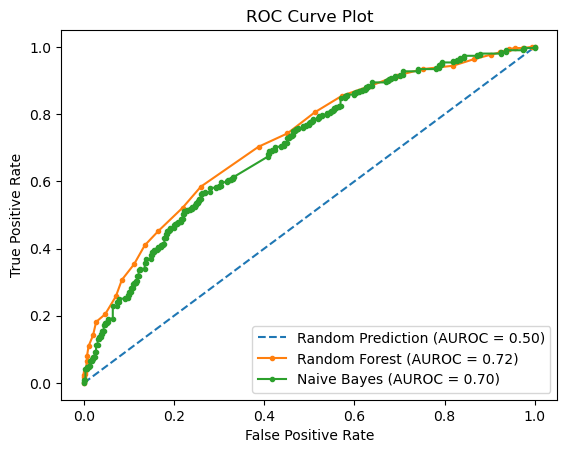

In [39]:
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random Prediction (AUROC = %0.2f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUROC = %0.2f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker = '.', label = 'Naive Bayes (AUROC = %0.2f)' % nb_auc)

plt.title('ROC Curve Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()